In [1]:
ENV["PYTHON"] ="/home/admin2/miniconda3/bin/python"

"/home/admin2/miniconda3/bin/python"

In [2]:
using MLDatasets
using PyPlot
using PyCall
using LinearAlgebra

In [3]:
#To supress dozens of Tensorflow logs.
py"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
"""

In [4]:
tf = pyimport("tensorflow")
tfds = pyimport("tensorflow_datasets")
np = pyimport("numpy")
plt = pyimport("matplotlib.pyplot")

PyObject <module 'matplotlib.pyplot' from '/home/admin2/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

It is need to use python file as module in the same directory:

In [5]:
pushfirst!(PyVector(pyimport("sys")."path"), "")

PyObject ['', '/home/admin2/miniconda3/lib/python37.zip', '/home/admin2/miniconda3/lib/python3.7', '/home/admin2/miniconda3/lib/python3.7/lib-dynload', '/home/admin2/miniconda3/lib/python3.7/site-packages', '/home/admin2/miniconda3/lib/python3.7/site-packages/IPython/extensions']

In [6]:
PyVector(pyimport("sys")."path")

6-element PyVector{PyAny}:
 ""
 "/home/admin2/miniconda3/lib/python37.zip"
 "/home/admin2/miniconda3/lib/python3.7"
 "/home/admin2/miniconda3/lib/python3.7/lib-dynload"
 "/home/admin2/miniconda3/lib/python3.7/site-packages"
 "/home/admin2/miniconda3/lib/python3.7/site-packages/IPython/extensions"

###  Preprocessing

In [7]:
data_util = pyimport("data_util2")
#function_name = pyimport("data_util2")["function_name"]

PyObject <module 'data_util2' from '/home/admin2/workspace/ku/comp541_project/data_util2.py'>

In [8]:
# load full training set
train_x, train_y = CIFAR10.traindata();

# load full test set
test_x,  test_y  = CIFAR10.testdata();

In [9]:
# [height,weight,channel] --> [weight,height]
train_x2 = permutedims(train_x, (2, 1, 3, 4));

In [10]:
image2 = train_x2[:,:,:,17];

#### Original image

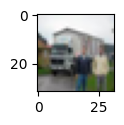

PyObject <matplotlib.image.AxesImage object at 0x7ff07b43a690>

In [11]:
plt.figure(figsize=(1,1))
plt.imshow(image2)

#### Transformed images 

In [12]:
image2_edit_a = data_util[:preprocess_image](image2, 32, 32,is_training=true).numpy();

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


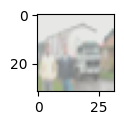

PyObject <matplotlib.image.AxesImage object at 0x7ff076f9dd10>

In [13]:
plt.figure(figsize=(1,1))
plt.imshow(image2_edit_a)

In [14]:
image2_edit_b = data_util[:preprocess_image](image2, 32, 32,is_training=true).numpy();

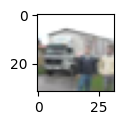

PyObject <matplotlib.image.AxesImage object at 0x7ff0501016d0>

In [15]:
plt.figure(figsize=(1,1))
plt.imshow(image2_edit_b)

Alternative way

In [16]:
#py"""
#from data_util2 import preprocess_image
#image2_edit = preprocess_image($image2, 32, 32,is_training=True)
#"""

### Create a batch

In [17]:
size(train_x2)

(32, 32, 3, 50000)

In [18]:
size(train_x2[:,:,:,1:256])

(32, 32, 3, 256)

In [19]:
n = size(train_x2)[end]
bsize = min(32, n)
cur, next = train_x2[:,:,:,1:bsize] , train_x2[:,:,:,bsize+1:end];

In [20]:
size(next)

(32, 32, 3, 49968)

In [21]:
size(cur)

(32, 32, 3, 32)

In [22]:
#data_util[:preprocess_image](cur[:,:,:,32], 32, 32,is_training=true).numpy();

new1 = cat( zeros(size(cur)), zeros(size(cur)); dims=4)
for i in (1:bsize)
    #print(i,"\n")
    image = cur[:,:,:,i]
    for k in (1:2)
        new1[:,:,:,2i+k-2] = data_util[:preprocess_image](image, 32, 32, is_training=true).numpy();
        #new1[:,:,:,2i] = data_util[:preprocess_image](image, 32, 32, is_training=true).numpy();
        #print(k,"-",2i+k-2,".","\n")
    end
end

In [23]:
newx1 = cat( zeros(size(cur)); dims=4)
for i in (1:bsize)
    image = cur[:,:,:,i]
    newx1[:,:,:,i] = data_util[:preprocess_image](image, 32, 32, is_training=true).numpy();
end

In [24]:
newx2 = cat( zeros(size(cur)); dims=4)
for i in (1:bsize)
    image = cur[:,:,:,i]
    newx2[:,:,:,i] = data_util[:preprocess_image](image, 32, 32, is_training=true).numpy();
end

In [25]:
summary(newx1)

"32×32×3×32 Array{Float64,4}"

In [26]:
summary(newx2)

"32×32×3×32 Array{Float64,4}"

In [27]:
newx = cat(newx1,newx2, dims=4);
summary(newx)

"32×32×3×64 Array{Float64,4}"

In [28]:
#py"""
#import tensorflow as tf 
#xs = []
#xs.append($newx1)
#xs.append($newx2)
#xt = xs
#image10 = tf.concat(xs, -1)
#"""


In [29]:
#py"image10"

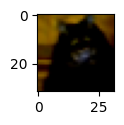

PyObject <matplotlib.image.AxesImage object at 0x7fef8c7c7590>

In [30]:
plt.figure(figsize=(1,1))
plt.imshow(newx1[:,:,:,27])

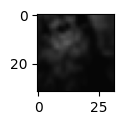

PyObject <matplotlib.image.AxesImage object at 0x7fef8c794f90>

In [31]:
plt.figure(figsize=(1,1))
plt.imshow(newx2[:,:,:,27])

function preproces(cur, bsize)
    for i in (1:bsize)
        image = cur[:,:,:,i]
        new1[:,:,:,i] = data_util[:preprocess_image](image, bsize, bsize, is_training=true).numpy();
    end
end

In [32]:
#plt.figure(figsize=(1,1))
#plt.imshow(new1[:,:,:,15])

In [33]:
#plt.figure(figsize=(1,1))
#plt.imshow(new1[:,:,:,16])

### ResNet 

In [34]:
include("resnetlib.jl")

Main.ResNetLib

In [35]:
#using Pkg; for p in ["IterTools", "Knet","ArgParse", "CUDA"]; Pkg.add(p); end
using Printf, Dates, Random, CUDA, Knet, ArgParse, Test, Base.Iterators, IterTools
ENV["COLUMNS"]=72
using Base.Iterators: flatten
using IterTools: ncycle, takenth
using Statistics: mean
using MLDatasets: MNIST
import CUDA
import Knet
using Knet: conv4, pool, mat, KnetArray, nll, zeroone, accuracy, progress, sgd, adam, rmsprop, param, param0, dropout, relu, minibatch, Data, sigm 

In [36]:
#w, m = ResNetLib.resnetcifarinit(50; nclasses=10)

In [37]:
w, m, _ = ResNetLib.resnet50init(;trained=false,dataset=:cifar10)

(KnetArray{Float32,N} where N[K32(3,3,3,256)[-0.03163931⋯], K32(512)[1.0⋯], K32(1,1,256,256)[0.030466212⋯], K32(512)[1.0⋯], K32(1,1,256,64)[-0.08112068⋯], K32(128)[1.0⋯], K32(3,3,64,64)[0.105838194⋯], K32(128)[1.0⋯], K32(1,1,64,256)[-0.03791607⋯], K32(512)[1.0⋯]  …  K32(1,1,512,2048)[0.08264599⋯], K32(4096)[1.0⋯], K32(1,1,2048,512)[-0.04473181⋯], K32(1024)[1.0⋯], K32(3,3,512,512)[0.0008913504⋯], K32(1024)[1.0⋯], K32(1,1,512,2048)[-0.042270713⋯], K32(4096)[1.0⋯], K32(10,2048)[-0.03785151⋯], K32(10,1)[0.0⋯]], Any[Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoment

In [38]:
#img = new1[:,:,:,1:32]

In [39]:
_atype = CUDA.functional() ? KnetArray{Float32} : Array{Float32}

KnetArray{Float32,N} where N

In [40]:
#img = convert(_atype, img)
#img1 = convert(_atype, newx1)
#img2 = convert(_atype, newx2)
img = convert(_atype, newx);

In [41]:
h = ResNetLib.resnet50(w ,m, img, dataset=:cifar10, stage=5);

In [42]:
size(h)

(1, 1, 2048, 64)

In [43]:
#h1 = ResNetLib.resnet50(w ,m, img1, dataset=:cifar10, stage=5)

In [44]:
#h2 = ResNetLib.resnet50(w ,m, img2, dataset=:cifar10, stage=5)

In [45]:
h = mat(h)

2048×64 KnetArray{Float32,2}:
 0.0681654   0.0617965  0.0190501  …  0.0        0.119478   0.121666
 0.094949    0.38478    0.365642      0.693605   0.290473   0.132875
 0.0         0.0        0.0           0.0        0.0        0.0
 7.72091     9.56064    4.69454       4.47697    7.15235   11.7766
 5.19578     7.05565    3.88734       3.3533     4.83286    8.57486
 0.995855    1.46127    0.455962   …  0.613869   0.793275   1.84726
 8.16281    12.0574     6.33576       6.91383    8.9465    14.6456
 1.3479      1.07321    0.512661      0.61748    1.30626    1.76243
 7.36208    10.035      4.91112       5.1135     7.30569   12.6694
 6.13764     9.47227    4.85643       5.48351    6.27798   10.6147
 0.279947    0.577252   0.165852   …  0.0177409  0.434781   1.03012
 1.4069      1.72252    1.44205       2.25986    1.14725    1.96781
 4.03313     4.78683    2.40094       3.46986    3.90365    6.16345
 ⋮                                 ⋱                       
 0.0         0.0        0.0     

In [46]:
#h1 = mat(h1)
#h2 = mat(h2)

In [47]:
#hh_1 = Array(h1)
#hh_2 = Array(h2)
#py"""

#import tensorflow as tf 

#xs = []
#xs.append($hh_1)
#xs.append($hh_2)
#xt = xs
#image = tf.concat(xs, -1)
#"""


In [48]:
#py"image"

In [49]:
#xs = []
#xs.append(h_1)
#xs.append(h_2)
#tf[:concat]([Array(h_1), Array(h_2)], -1).numpy()

In [50]:
mat_h = mat(h)

2048×64 KnetArray{Float32,2}:
 0.0681654   0.0617965  0.0190501  …  0.0        0.119478   0.121666
 0.094949    0.38478    0.365642      0.693605   0.290473   0.132875
 0.0         0.0        0.0           0.0        0.0        0.0
 7.72091     9.56064    4.69454       4.47697    7.15235   11.7766
 5.19578     7.05565    3.88734       3.3533     4.83286    8.57486
 0.995855    1.46127    0.455962   …  0.613869   0.793275   1.84726
 8.16281    12.0574     6.33576       6.91383    8.9465    14.6456
 1.3479      1.07321    0.512661      0.61748    1.30626    1.76243
 7.36208    10.035      4.91112       5.1135     7.30569   12.6694
 6.13764     9.47227    4.85643       5.48351    6.27798   10.6147
 0.279947    0.577252   0.165852   …  0.0177409  0.434781   1.03012
 1.4069      1.72252    1.44205       2.25986    1.14725    1.96781
 4.03313     4.78683    2.40094       3.46986    3.90365    6.16345
 ⋮                                 ⋱                       
 0.0         0.0        0.0     

###  Projection

In [51]:
# dense layer:
struct Dense; w; b; f; end
(d::Dense)(x) = d.f.(d.w * mat(x) .+ d.b)
Dense(i::Int,o::Int,f=Knet.relu) = Dense(param(o,i), param0(o), f)

Dense

In [52]:
projection = Dense(2048,128)

Dense(P(KnetArray{Float32,2}(128,2048)), P(KnetArray{Float32,1}(128)), Knet.Ops20.relu)

In [53]:
z = projection(mat_h)'

64×128 KnetArray{Float32,2}:
 0.767758  2.10666    2.32063    …  0.0  0.467024     6.91848
 2.49083   2.42055    1.39446       0.0  0.448247    11.1558
 1.72694   2.16937    0.53309       0.0  0.0          5.60984
 1.60252   1.96025    2.64115       0.0  0.65106      9.23041
 1.35538   1.93666    1.82761       0.0  0.0          7.58443
 0.23534   1.57044    1.03387    …  0.0  0.0          5.16349
 1.29856   2.87637    2.106         0.0  0.470974     9.00149
 0.92459   1.81768    1.53624       0.0  0.547997     8.00793
 1.79815   2.01148    2.51103       0.0  0.473232    11.1988
 0.0       0.0149513  0.0115202     0.0  0.0          0.0241925
 1.69701   1.64947    1.66957    …  0.0  0.438464     8.05716
 1.77332   2.87846    2.80425       0.0  0.567141    12.4613
 2.15195   2.69347    1.30131       0.0  0.381554    10.6107
 ⋮                               ⋱  ⋮                
 0.171151  1.91355    1.77648       0.0  0.0          4.15757
 0.488714  2.56836    2.54969       0.0  0.412979  

### Contrastive Loss

First way

In [54]:
z_a = Array(z)

64×128 Array{Float32,2}:
 0.767758  2.10666    2.32063    …  0.0  0.467024     6.91848
 2.49083   2.42055    1.39446       0.0  0.448247    11.1558
 1.72694   2.16937    0.53309       0.0  0.0          5.60984
 1.60252   1.96025    2.64115       0.0  0.65106      9.23041
 1.35538   1.93666    1.82761       0.0  0.0          7.58443
 0.23534   1.57044    1.03387    …  0.0  0.0          5.16349
 1.29856   2.87637    2.106         0.0  0.470974     9.00149
 0.92459   1.81768    1.53624       0.0  0.547997     8.00793
 1.79815   2.01148    2.51103       0.0  0.473232    11.1988
 0.0       0.0149513  0.0115202     0.0  0.0          0.0241925
 1.69701   1.64947    1.66957    …  0.0  0.438464     8.05716
 1.77332   2.87846    2.80425       0.0  0.567141    12.4613
 2.15195   2.69347    1.30131       0.0  0.381554    10.6107
 ⋮                               ⋱  ⋮                
 0.171151  1.91355    1.77648       0.0  0.0          4.15757
 0.488714  2.56836    2.54969       0.0  0.412979     9

In [55]:
py"""
import torch
import torch.nn.functional as F
zz = torch.tensor($z_a)
cos_z = F.cosine_similarity( torch.unsqueeze(zz, 1), torch.unsqueeze(zz, 0), 2).numpy()

"""

In [56]:
cos_z1 = py"cos_z"

64×64 Array{Float32,2}:
 1.0       0.996259  0.992206  …  0.986819  0.9983    0.997592
 0.996259  1.0       0.996613     0.986508  0.998106  0.998858
 0.992206  0.996613  1.0          0.987533  0.994414  0.994115
 0.99862   0.997095  0.99194      0.987846  0.999177  0.998554
 0.996823  0.998639  0.996269     0.989431  0.998383  0.998415
 0.995573  0.996418  0.996282  …  0.988451  0.996211  0.996061
 0.997962  0.998126  0.99489      0.988635  0.999007  0.998578
 0.996641  0.998889  0.995628     0.984856  0.997576  0.998859
 0.997327  0.998301  0.993549     0.987744  0.999125  0.999257
 0.957     0.948944  0.951036     0.975964  0.953264  0.947545
 0.997514  0.998932  0.994366  …  0.987656  0.999299  0.999426
 0.996693  0.999302  0.995275     0.987801  0.998379  0.999115
 0.994671  0.999096  0.997653     0.986772  0.996666  0.997584
 ⋮                             ⋱                      
 0.995927  0.989513  0.987284     0.989336  0.993457  0.990853
 0.997432  0.998032  0.995098     0.989

In [57]:
cos_z1[1,33]

0.99881506f0

In [58]:
z = convert(_atype, z)

64×128 KnetArray{Float32,2}:
 0.767758  2.10666    2.32063    …  0.0  0.467024     6.91848
 2.49083   2.42055    1.39446       0.0  0.448247    11.1558
 1.72694   2.16937    0.53309       0.0  0.0          5.60984
 1.60252   1.96025    2.64115       0.0  0.65106      9.23041
 1.35538   1.93666    1.82761       0.0  0.0          7.58443
 0.23534   1.57044    1.03387    …  0.0  0.0          5.16349
 1.29856   2.87637    2.106         0.0  0.470974     9.00149
 0.92459   1.81768    1.53624       0.0  0.547997     8.00793
 1.79815   2.01148    2.51103       0.0  0.473232    11.1988
 0.0       0.0149513  0.0115202     0.0  0.0          0.0241925
 1.69701   1.64947    1.66957    …  0.0  0.438464     8.05716
 1.77332   2.87846    2.80425       0.0  0.567141    12.4613
 2.15195   2.69347    1.30131       0.0  0.381554    10.6107
 ⋮                               ⋱  ⋮                
 0.171151  1.91355    1.77648       0.0  0.0          4.15757
 0.488714  2.56836    2.54969       0.0  0.412979  

Second way

In [59]:
z1 = z[1:32,:]

32×128 KnetArray{Float32,2}:
 0.767758  2.10666    2.32063    …  0.0  0.467024     6.91848
 2.49083   2.42055    1.39446       0.0  0.448247    11.1558
 1.72694   2.16937    0.53309       0.0  0.0          5.60984
 1.60252   1.96025    2.64115       0.0  0.65106      9.23041
 1.35538   1.93666    1.82761       0.0  0.0          7.58443
 0.23534   1.57044    1.03387    …  0.0  0.0          5.16349
 1.29856   2.87637    2.106         0.0  0.470974     9.00149
 0.92459   1.81768    1.53624       0.0  0.547997     8.00793
 1.79815   2.01148    2.51103       0.0  0.473232    11.1988
 0.0       0.0149513  0.0115202     0.0  0.0          0.0241925
 1.69701   1.64947    1.66957    …  0.0  0.438464     8.05716
 1.77332   2.87846    2.80425       0.0  0.567141    12.4613
 2.15195   2.69347    1.30131       0.0  0.381554    10.6107
 ⋮                               ⋱  ⋮                
 2.2369    2.35943    2.59253    …  0.0  0.655415    11.6543
 0.533842  1.98997    1.87868       0.0  0.215955   

In [60]:
z2 = z[33:64,:]

32×128 KnetArray{Float32,2}:
 1.41258   2.72433   2.45849   2.31028   …  0.0  0.015317     9.45793
 1.73264   2.70974   2.82772   2.64247      0.0  0.0         10.1937
 1.30958   1.55937   1.21394   1.20308      0.0  0.328438     6.73427
 0.742861  1.40152   1.16778   1.20635      0.0  0.0          3.42887
 1.25257   2.51925   2.27607   2.00778      0.0  0.0240655    7.084
 0.199529  1.22481   1.2848    1.22922   …  0.0  0.419503     5.32067
 0.996582  1.9239    1.14521   1.6473       0.0  0.0988255    5.71956
 0.0       1.50058   1.51569   1.63474      0.0  0.0          5.69057
 1.9463    1.48995   1.96134   2.18705      0.0  0.296616     9.58694
 2.22574   2.72069   1.13903   2.12776      0.0  0.0542319    9.22398
 0.396139  0.570671  0.68827   0.608356  …  0.0  0.0951995    2.57589
 1.60822   3.37232   1.15241   1.47104      0.0  0.265285     9.28207
 1.393     1.86653   1.8254    2.05906      0.0  0.504294     9.1003
 ⋮                                       ⋱  ⋮                
 0.

In [61]:
sim_l1_2 =  z1[1,:]'*z2[1,:] / (norm(z1[1,:])*norm(z2[1,:]))

0.9988151f0

In [62]:
cos_z1[1,33] ≈ sim_l1_2

true

In [63]:
sim_one = zeros(32)
for k in 1:32
    #print(k,"\n")
    sim_one[k] = exp( z1[k,:]'*z2[k,:] / (norm(z1[k,:])*norm(z2[k,:])))
end

In [64]:
sim_one_all = [sim_one; sim_one]

64-element Array{Float64,1}:
 2.7150628566741943
 2.7093141078948975
 2.7119157314300537
 2.7051196098327637
 2.7114315032958984
 2.712904214859009
 2.7151782512664795
 2.709169626235962
 2.7173657417297363
 2.586040496826172
 2.71622896194458
 2.7108302116394043
 2.7146191596984863
 ⋮
 2.696890354156494
 2.7148633003234863
 2.684014320373535
 2.682433843612671
 2.7034096717834473
 2.7146646976470947
 2.7080414295196533
 2.6982221603393555
 2.7151882648468018
 2.7085981369018555
 2.7170138359069824
 2.6973111629486084

In [65]:
sum_all = zeros(64)
for k in 1:64
    for i in 1:64
        if i!=k
            #print(k,"-",i,"\n")
            sum_all[k] += exp(z[k,:]'*z[i,:] / (norm(z[k,:])*norm(z[i,:])))
        end
    end
end

In [66]:
sum_all

64-element Array{Float64,1}:
 170.35447239875793
 170.44579601287842
 170.07170248031616
 170.36492657661438
 170.5226171016693
 170.3324236869812
 170.51332092285156
 170.39233946800232
 170.44555139541626
 163.804190158844
 170.47560930252075
 170.48369550704956
 170.36185932159424
   ⋮
 169.7170054912567
 170.51766705513
 170.20640230178833
 170.3432834148407
 170.4552083015442
 170.48638343811035
 170.30843257904053
 170.0030643939972
 170.48960137367249
 169.17034006118774
 170.4846649169922
 170.42452263832092

In [67]:
sim_one_all ./ sum_all

64-element Array{Float64,1}:
 0.01593772572239195
 0.015895458681129272
 0.01594571990448515
 0.01587838332801588
 0.01590071481062998
 0.015927115672612607
 0.01592355504292217
 0.015899597568144852
 0.015942720238122998
 0.01578738916457778
 0.01593324096659742
 0.01590081798483369
 0.01593443022110991
 ⋮
 0.015890513424687013
 0.015921302157187883
 0.01576917368604374
 0.015747224016341644
 0.01585994173320286
 0.01592305873877938
 0.015900806486859334
 0.01587160896162428
 0.015925829158904288
 0.016011069883303267
 0.015936998422877963
 0.015827013162142797

In [68]:
sum(sim_one_all ./ sum_all)/64

0.015889278838766396

In [69]:
-log(sum(sim_one_all ./ sum_all)/64)

4.142110684059624

In [70]:
#l1_2 = -log(sim_l1_2/sum1)

### Contrastive Loss (vectorized)

In [71]:
norm_z = convert(_atype, mapslices(norm, Array(z), dims=[2]))

64×1 KnetArray{Float32,2}:
 53.245144
 74.47934
 37.708797
 67.42915
 52.426975
 32.77823
 65.534584
 53.52691
 75.46441
  0.20492613
 56.377193
 83.401886
 71.340996
  ⋮
 33.124302
 63.35314
 10.660766
 29.351032
 69.89931
 76.149315
 13.926477
 19.887281
 31.759327
 37.995815
 54.367493
 91.56539

In [72]:
#norm_z = convert(_atype,clamp.(mapslices(norm, Array(z), dims=[1]), 1e-12, Inf))

In [73]:
z

64×128 KnetArray{Float32,2}:
 0.767758  2.10666    2.32063    …  0.0  0.467024     6.91848
 2.49083   2.42055    1.39446       0.0  0.448247    11.1558
 1.72694   2.16937    0.53309       0.0  0.0          5.60984
 1.60252   1.96025    2.64115       0.0  0.65106      9.23041
 1.35538   1.93666    1.82761       0.0  0.0          7.58443
 0.23534   1.57044    1.03387    …  0.0  0.0          5.16349
 1.29856   2.87637    2.106         0.0  0.470974     9.00149
 0.92459   1.81768    1.53624       0.0  0.547997     8.00793
 1.79815   2.01148    2.51103       0.0  0.473232    11.1988
 0.0       0.0149513  0.0115202     0.0  0.0          0.0241925
 1.69701   1.64947    1.66957    …  0.0  0.438464     8.05716
 1.77332   2.87846    2.80425       0.0  0.567141    12.4613
 2.15195   2.69347    1.30131       0.0  0.381554    10.6107
 ⋮                               ⋱  ⋮                
 0.171151  1.91355    1.77648       0.0  0.0          4.15757
 0.488714  2.56836    2.54969       0.0  0.412979  

In [74]:
zx = z ./ norm_z

64×128 KnetArray{Float32,2}:
 0.0144193   0.0395654  0.0435838  …  0.0  0.0087712    0.129936
 0.0334432   0.0324996  0.0187227     0.0  0.00601841   0.149784
 0.0457966   0.0575295  0.014137      0.0  0.0          0.148767
 0.023766    0.0290712  0.0391693     0.0  0.00965547   0.136891
 0.0258528   0.0369401  0.0348601     0.0  0.0          0.144666
 0.00717978  0.047911   0.0315413  …  0.0  0.0          0.157528
 0.0198149   0.0438909  0.0321358     0.0  0.00718665   0.137355
 0.0172734   0.0339582  0.0287003     0.0  0.0102378    0.149606
 0.0238278   0.0266546  0.0332743     0.0  0.00627093   0.148399
 0.0         0.0729594  0.0562163     0.0  0.0          0.118055
 0.0301011   0.0292577  0.0296143  …  0.0  0.00777733   0.142915
 0.0212623   0.0345131  0.0336234     0.0  0.00680009   0.149412
 0.0301642   0.0377549  0.0182407     0.0  0.00534831   0.148732
 ⋮                                 ⋱  ⋮                 
 0.00516693  0.0577689  0.0536306     0.0  0.0          0.125514
 0.0

In [75]:
z1 = zx[1:32,:]

32×128 KnetArray{Float32,2}:
 0.0144193   0.0395654  0.0435838   …  0.0  0.0087712    0.129936
 0.0334432   0.0324996  0.0187227      0.0  0.00601841   0.149784
 0.0457966   0.0575295  0.014137       0.0  0.0          0.148767
 0.023766    0.0290712  0.0391693      0.0  0.00965547   0.136891
 0.0258528   0.0369401  0.0348601      0.0  0.0          0.144666
 0.00717978  0.047911   0.0315413   …  0.0  0.0          0.157528
 0.0198149   0.0438909  0.0321358      0.0  0.00718665   0.137355
 0.0172734   0.0339582  0.0287003      0.0  0.0102378    0.149606
 0.0238278   0.0266546  0.0332743      0.0  0.00627093   0.148399
 0.0         0.0729594  0.0562163      0.0  0.0          0.118055
 0.0301011   0.0292577  0.0296143   …  0.0  0.00777733   0.142915
 0.0212623   0.0345131  0.0336234      0.0  0.00680009   0.149412
 0.0301642   0.0377549  0.0182407      0.0  0.00534831   0.148732
 ⋮                                  ⋱  ⋮                 
 0.0273897   0.0288901  0.0317443   …  0.0  0.00802523 

In [76]:
z2 = zx[33:64,:]

32×128 KnetArray{Float32,2}:
 0.0202158   0.0389885  0.0351839  …  0.0  0.000219204  0.135355
 0.0245579   0.0384071  0.0400794     0.0  0.0          0.144483
 0.0297888   0.0354708  0.0276134     0.0  0.00747092   0.153183
 0.0275403   0.051959   0.0432935     0.0  0.0          0.12712
 0.0220983   0.0444455  0.0401553     0.0  0.000424573  0.124979
 0.00581164  0.0356747  0.0374221  …  0.0  0.0122188    0.154974
 0.0234101   0.0451932  0.0269015     0.0  0.00232145   0.134355
 0.0         0.0403192  0.040725      0.0  0.0          0.1529
 0.0304225   0.0232894  0.0306576     0.0  0.00463639   0.149853
 0.0363789   0.0444687  0.018617      0.0  0.0008864    0.150763
 0.0205352   0.0295826  0.0356787  …  0.0  0.00493497   0.13353
 0.026131    0.0547949  0.0187249     0.0  0.00431045   0.150819
 0.0241465   0.0323548  0.0316419     0.0  0.00874154   0.157747
 ⋮                                 ⋱  ⋮                 
 0.00516693  0.0577689  0.0536306  …  0.0  0.0          0.125514
 0.00771

In [77]:
n = size(z1)[1]

32

In [78]:
labels = convert(_atype, Matrix{Float64}(I, 32, 64))

32×64 KnetArray{Float32,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮         ⋱            ⋮              
 0.0  0.0  0.0  0.0  0.

In [79]:
mask = convert(_atype, Matrix{Float64}(I, 32, 32)*1e9)

32×32 KnetArray{Float32,2}:
 1.0f9  0.0    0.0    0.0    0.0    …  0.0    0.0    0.0    0.0
 0.0    1.0f9  0.0    0.0    0.0       0.0    0.0    0.0    0.0
 0.0    0.0    1.0f9  0.0    0.0       0.0    0.0    0.0    0.0
 0.0    0.0    0.0    1.0f9  0.0       0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    1.0f9     0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0    …  0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0    …  0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0
 ⋮                                  ⋱                ⋮      
 0.0    0.0    0.0    0.0    0.0    …  0.0    0.0    0.0    0.0
 0.0    0.0    

In [80]:
logits_aa = z1*transpose(z1)-mask

32×32 KnetArray{Float32,2}:
 -1.0f9      0.996259   0.992207  …   0.988475   0.998109   0.989741
  0.996259  -1.0f9      0.996613      0.989943   0.998696   0.994224
  0.992207   0.996613  -1.0f9         0.992454   0.994988   0.997245
  0.998621   0.997095   0.99194       0.988185   0.998868   0.988346
  0.996823   0.998639   0.996269      0.991177   0.998751   0.99394
  0.995573   0.996418   0.996282  …   0.992017   0.996389   0.995423
  0.997962   0.998126   0.99489       0.990287   0.998837   0.992741
  0.996641   0.998889   0.995628      0.988828   0.998188   0.995261
  0.997327   0.998301   0.993549      0.988633   0.999016   0.991014
  0.957      0.948944   0.951036      0.968429   0.951398   0.950724
  0.997514   0.998932   0.994366  …   0.989424   0.999482   0.991554
  0.996693   0.999302   0.995275      0.990474   0.998672   0.99312
  0.994671   0.999096   0.997653      0.990941   0.997521   0.996363
  ⋮                               ⋱              ⋮         
  0.998129   0.99

In [81]:
logits_bb = z2*transpose(z2)-mask

32×32 KnetArray{Float32,2}:
 -1.0f9      0.998331   0.994748  …   0.987663   0.999425   0.998928
  0.998331  -1.0f9      0.992646      0.990974   0.998481   0.997324
  0.994748   0.992646  -1.0f9         0.986243   0.994841   0.996105
  0.996889   0.9966     0.992074      0.989088   0.995905   0.994647
  0.998503   0.9989     0.9925        0.990499   0.998465   0.996887
  0.998477   0.996481   0.995377  …   0.985767   0.997833   0.99829
  0.998479   0.997229   0.997131      0.988917   0.998382   0.998279
  0.998083   0.998432   0.994352      0.990764   0.997464   0.997133
  0.998537   0.998368   0.99561       0.988053   0.998983   0.999153
  0.995573   0.99385    0.999075      0.986294   0.995449   0.99656
  0.99939    0.99787    0.995601  …   0.987117   0.999456   0.999219
  0.995793   0.993786   0.998403      0.98707    0.995827   0.996203
  0.99616    0.995394   0.998355      0.988768   0.996401   0.997365
  ⋮                               ⋱              ⋮         
  0.993884   0.99

In [82]:
logits_ab = z1*transpose(z2)

32×32 KnetArray{Float32,2}:
 0.998815  0.997769  0.992977  …  0.986819  0.9983    0.997592
 0.998043  0.996695  0.997699     0.986508  0.998106  0.998858
 0.994048  0.992594  0.997655     0.987533  0.994414  0.994115
 0.998866  0.998536  0.993083     0.987846  0.999177  0.998554
 0.998272  0.997641  0.997003     0.989431  0.998383  0.998415
 0.996841  0.995256  0.996202  …  0.988451  0.996211  0.996061
 0.999149  0.99821   0.99553      0.988635  0.999007  0.998578
 0.997829  0.995521  0.997696     0.984856  0.997576  0.998859
 0.998833  0.998537  0.99517      0.987744  0.999125  0.999257
 0.953185  0.958176  0.950315     0.975964  0.953264  0.947545
 0.999026  0.998067  0.995652  …  0.987656  0.999299  0.999426
 0.998354  0.997121  0.997198     0.987801  0.998379  0.999115
 0.996537  0.99471   0.998867     0.986772  0.996666  0.997584
 ⋮                             ⋱            ⋮         
 0.999212  0.997959  0.995171  …  0.986213  0.999313  0.999648
 0.996759  0.996276  0.99694      0

In [83]:
logits_ba = z2*transpose(z1)

32×32 KnetArray{Float32,2}:
 0.998815  0.998043  0.994048  …  0.989278  0.999276  0.991624
 0.997769  0.996695  0.992594     0.990999  0.998055  0.988669
 0.992977  0.997699  0.997655     0.990999  0.995566  0.997218
 0.997157  0.994492  0.992866     0.989802  0.996069  0.990907
 0.997795  0.996134  0.99269      0.990568  0.998058  0.989749
 0.997351  0.997081  0.993963  …  0.988827  0.997761  0.992951
 0.997334  0.998768  0.996543     0.991152  0.998838  0.99481
 0.997672  0.99679   0.993282     0.992202  0.997309  0.991073
 0.996981  0.998666  0.994339     0.989188  0.999086  0.991456
 0.993869  0.998372  0.99822      0.991067  0.996524  0.99728
 0.998444  0.99855   0.994503  …  0.988783  0.999419  0.992063
 0.993736  0.997658  0.998174     0.991706  0.996099  0.997567
 0.994196  0.99828   0.996076     0.991778  0.997019  0.994883
 ⋮                             ⋱            ⋮         
 0.995927  0.989513  0.987284  …  0.988685  0.992419  0.984298
 0.997432  0.998032  0.995098     0.9

In [84]:
logits_aa1 = Array(logits_aa)
logits_ab1 = Array(logits_ab)
logits_bb1 = Array(logits_bb)
logits_ba1 = Array(logits_ba)
labels1 = Array(labels)
py"""
import tensorflow as tf

loss_a = tf.losses.categorical_crossentropy(
      $labels1, tf.concat([$logits_ab1, $logits_aa1], 1), from_logits=True).numpy()

loss_b = tf.losses.categorical_crossentropy(
      $labels1, tf.concat([$logits_ba1, $logits_bb1], 1), from_logits=True).numpy()
"""

In [85]:
#KERNEL DIED WHEN RUNNING THIS PART
#logits_aa1 = Array(logits_aa)
#logits_ab1 = Array(logits_ab)
#logits_bb1 = Array(logits_bb)
#logits_ba1 = Array(logits_ba)
#labels1 = Array(labels)
#py"""
#import tensorflow.compat.v1 as tf


#loss_a = tf.losses.softmax_cross_entropy(
#      $labels1, tf.concat([$logits_ab1, $logits_aa1], 1)).numpy()

#loss_b = tf.losses.softmax_cross_entropy(
#      $labels1, tf.concat([$logits_ba1, $logits_bb1], 1)).numpy()

#print(loss_a, loss_b)
#"""

In [86]:
py"loss_a"

32-element Array{Float32,1}:
 0.9548188
 0.9254902
 0.9411765
 0.92941177
 0.9411765
 0.9372549
 0.9411765
 0.9529412
 0.94509804
 0.94509804
 0.95686275
 0.9529412
 0.9607843
 ⋮
 0.9764706
 1.0
 0.9882353
 0.99215686
 1.0
 0.99215686
 0.99607843
 0.94509804
 0.94509804
 0.94509804
 0.84313726
 0.84313726

In [87]:
py"loss_b"

32-element Array{Float32,1}:
 0.9548188
 0.9254902
 0.9411765
 0.92941177
 0.9411765
 0.9372549
 0.9411765
 0.9529412
 0.94509804
 0.94509804
 0.95686275
 0.9529412
 0.9607843
 ⋮
 0.9764706
 1.0
 0.9882353
 0.99215686
 1.0
 0.99215686
 0.99607843
 0.94509804
 0.94509804
 0.94509804
 0.84313726
 0.84313726

In [88]:
loss = py"loss_a"+py"loss_b"

32-element Array{Float32,1}:
 1.9096376
 1.8509804
 1.882353
 1.8588235
 1.882353
 1.8745098
 1.882353
 1.9058824
 1.8901961
 1.8901961
 1.9137255
 1.9058824
 1.9215686
 ⋮
 1.9529412
 2.0
 1.9764706
 1.9843137
 2.0
 1.9843137
 1.9921569
 1.8901961
 1.8901961
 1.8901961
 1.6862745
 1.6862745

In [89]:
sum(py"loss_a")

30.558744f0

In [90]:
sum(py"loss_b")

30.558744f0

In [91]:
#labels3 = round.(Int, labels1)

In [92]:
kk1 = convert(_atype, [logits_ab1 logits_aa1])

32×64 KnetArray{Float32,2}:
 0.998815  0.997769  0.992977  …   0.988475   0.998109   0.989741
 0.998043  0.996695  0.997699      0.989943   0.998696   0.994224
 0.994048  0.992594  0.997655      0.992454   0.994988   0.997245
 0.998866  0.998536  0.993083      0.988185   0.998868   0.988346
 0.998272  0.997641  0.997003      0.991177   0.998751   0.99394
 0.996841  0.995256  0.996202  …   0.992017   0.996389   0.995423
 0.999149  0.99821   0.99553       0.990287   0.998837   0.992741
 0.997829  0.995521  0.997696      0.988828   0.998188   0.995261
 0.998833  0.998537  0.99517       0.988633   0.999016   0.991014
 0.953185  0.958176  0.950315      0.968429   0.951398   0.950724
 0.999026  0.998067  0.995652  …   0.989424   0.999482   0.991554
 0.998354  0.997121  0.997198      0.990474   0.998672   0.99312
 0.996537  0.99471   0.998867      0.990941   0.997521   0.996363
 ⋮                             ⋱                        
 0.999212  0.997959  0.995171  …   0.988053   0.999304   0.

In [93]:
kk2 = convert(_atype, [logits_ba1 logits_bb1])

32×64 KnetArray{Float32,2}:
 0.998815  0.998043  0.994048  …   0.987663   0.999425   0.998928
 0.997769  0.996695  0.992594      0.990974   0.998481   0.997324
 0.992977  0.997699  0.997655      0.986243   0.994841   0.996105
 0.997157  0.994492  0.992866      0.989088   0.995905   0.994647
 0.997795  0.996134  0.99269       0.990499   0.998465   0.996887
 0.997351  0.997081  0.993963  …   0.985767   0.997833   0.99829
 0.997334  0.998768  0.996543      0.988917   0.998382   0.998279
 0.997672  0.99679   0.993282      0.990764   0.997464   0.997133
 0.996981  0.998666  0.994339      0.988053   0.998983   0.999153
 0.993869  0.998372  0.99822       0.986294   0.995449   0.99656
 0.998444  0.99855   0.994503  …   0.987117   0.999456   0.999219
 0.993736  0.997658  0.998174      0.98707    0.995827   0.996203
 0.994196  0.99828   0.996076      0.988768   0.996401   0.997365
 ⋮                             ⋱                        
 0.995927  0.989513  0.987284  …   0.989336   0.993457   0.

In [94]:
kk_s1 = logsoftmax(kk1, dims=1)

32×64 KnetArray{Float32,2}:
 -3.46232  -3.46277  -3.46621  …  -3.43471  -3.43117  -3.43471
 -3.4631   -3.46384  -3.46149     -3.43324  -3.43058  -3.43023
 -3.46709  -3.46795  -3.46154     -3.43073  -3.43429  -3.4272
 -3.46227  -3.462    -3.46611     -3.435    -3.43041  -3.4361
 -3.46287  -3.4629   -3.46219     -3.43201  -3.43052  -3.43051
 -3.4643   -3.46528  -3.46299  …  -3.43117  -3.43289  -3.42903
 -3.46199  -3.46233  -3.46366     -3.4329   -3.43044  -3.43171
 -3.46331  -3.46502  -3.4615      -3.43436  -3.43109  -3.42919
 -3.46231  -3.462    -3.46402     -3.43455  -3.43026  -3.43344
 -3.50795  -3.50236  -3.50888     -3.45476  -3.47788  -3.47372
 -3.46211  -3.46247  -3.46354  …  -3.43376  -3.42979  -3.4329
 -3.46278  -3.46342  -3.46199     -3.43271  -3.4306   -3.43133
 -3.4646   -3.46583  -3.46032     -3.43225  -3.43175  -3.42809
  ⋮                            ⋱                      
 -3.46193  -3.46258  -3.46402  …  -3.43513  -3.42997  -3.43349
 -3.46438  -3.46426  -3.46225     -3.4

In [95]:
kk_s2 = logsoftmax(kk2, dims=1)

32×64 KnetArray{Float32,2}:
 -3.46195  -3.46335  -3.46531  …  -3.4342   -3.4302   -3.43033
 -3.463    -3.4647   -3.46677     -3.43089  -3.43114  -3.43193
 -3.46779  -3.46369  -3.46171     -3.43562  -3.43478  -3.43315
 -3.46361  -3.4669   -3.4665      -3.43278  -3.43372  -3.43461
 -3.46297  -3.46526  -3.46667     -3.43137  -3.43116  -3.43237
 -3.46341  -3.46431  -3.4654   …  -3.4361   -3.43179  -3.43096
 -3.46343  -3.46262  -3.46282     -3.43295  -3.43124  -3.43097
 -3.46309  -3.4646   -3.46608     -3.4311   -3.43216  -3.43212
 -3.46378  -3.46273  -3.46502     -3.43381  -3.43064  -3.4301
 -3.4669   -3.46302  -3.46114     -3.43557  -3.43418  -3.43269
 -3.46232  -3.46284  -3.46486  …  -3.43475  -3.43017  -3.43003
 -3.46703  -3.46373  -3.46119     -3.43479  -3.4338   -3.43305
 -3.46657  -3.46311  -3.46329     -3.4331   -3.43322  -3.43189
  ⋮                            ⋱                      
 -3.46484  -3.47188  -3.47208  …  -3.43253  -3.43617  -3.4384
 -3.46333  -3.46336  -3.46426     -3.

In [96]:
labels.*kk_s1

32×64 KnetArray{Float32,2}:
 -3.46232  -0.0      -0.0      …  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -3.46384  -0.0         -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -3.46154     -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0         -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0         -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0      …  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0         -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0         -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0         -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0         -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0      …  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0         -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0         -0.0  -0.0  -0.0  -0.0  -0.0
  ⋮                            ⋱         ⋮                
 -0.0      -0.0      -0.0      …  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0      -0.0      -0.0      

In [97]:
-sum(sum(labels.*kk_s1, dims=1)[1:32])/32

3.4648137f0

In [98]:
-sum(sum(labels.*kk_s2, dims=1)[1:32])/32

3.4648046f0

### Minimize loss